## Dataset Information

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
%pip install nltk
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas openpyxl


  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 808.7 kB/s eta 0:00:00 0:00:01
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 428.5 kB/s eta 0:00:0000:0100:01
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 612.3 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.9/507.9 kB 1.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 kB 1.1 MB/s eta 0:00:00a 0:00:01
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


old - 
1 - Positive
2 - Negative
3 - Neutral 

## Loading the Dataset

In [4]:
df = pd.read_csv('Text_data.csv', encoding='ISO-8859-1')
df.head()

,title,Valence,tone,description,Vineeth
0,RT @shannakaee: BLUNT - rolled with leaf ie: b...,3,neutral,NaN,neutral
1,"RT @SynthNiska: If we're talking tobacco, good...",1,positive,NaN,positive
2,@RepThomasMassie Can you introduce a bill decr...,2,negative,NaN,negative
3,"You know, dank herb. The za. The lord's loud. ...",3,positive,NaN,neutral
4,"@riddikulus_puff Weed, wet dog, clean laundry,...",3,positive,NaN,neutral


* One (1) indicates it’s a positive sentiment

* Two (2) indicates it’s a negative sentiment 

* Three (3) indicates it’s a neutral sentiment

In [5]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        1000 non-null   object 
 1   Valence      1000 non-null   int64  
 2   tone         1000 non-null   object 
 3   description  0 non-null      float64
 4   Vineeth      500 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [6]:
# Get the number of rows and columns (shape)
print("\nShape of the DataFrame (rows, columns):")
print(df.shape)

# Get the number of rows
print("\nNumber of rows:")
print(len(df))

# Get the column names
print("\nColumn names:")
print(df.columns)


Shape of the DataFrame (rows, columns):
(1000, 5)

Number of rows:
1000

Column names:
Index(['title', 'Valence', 'tone', 'description', 'Vineeth'], dtype='object')


In [7]:
# Check for missing values in the DataFrame
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())



Missing values in each column:
title             0
Valence           0
tone              0
description    1000
Vineeth         500
dtype: int64

Number of duplicate rows:
204


In [8]:
# Find duplicate rows
duplicates = df[df.duplicated()]

# Print the duplicate rows
print(duplicates)

                                                 title  Valence      tone  \
14   RT @freakouts4u: Man gets caught with tobacco ...        3  negative   
33   RT @freakouts4u: Man gets caught with tobacco ...        3  negative   
38   RT @freakouts4u: Man gets caught with tobacco ...        3  negative   
74    ?? ?????? ??\nSant Rampal Ji Maharaj\n\nHas ...        2   neutral   
76    ?? ?????? ??\nSant Rampal Ji Maharaj\n\nHas ...        2   neutral   
..                                                 ...      ...       ...   
979  RT @FirstDoctor: Codeine ? coma\nEcstasy ? sei...        2  negative   
982  RT @DJZeeti: Niggas said the 5G towers was kil...        3  negative   
983   made Tolkien near the end of his life. he re...        3  negative   
995  RT @FirstDoctor: Codeine ? coma\nEcstasy ? sei...        2  negative   
997  RT @FirstDoctor: Codeine ? coma\nEcstasy ? sei...        2  negative   

     description   Vineeth  
14           NaN   neutral  
33           NaN 

In [19]:
# Drop duplicate rows in the DataFrame
df = df.drop_duplicates()

# Optionally, reset the index after dropping duplicates
df = df.reset_index(drop=True)

# Check the DataFrame again
print("\nData after dropping duplicates:")
print(df.head())



Data after dropping duplicates:
                                               title  Valence      tone  \
0  RT @shannakaee: BLUNT - rolled with leaf ie: b...        3   neutral   
1  RT @SynthNiska: If we're talking tobacco, good...        1  positive   
2  @RepThomasMassie Can you introduce a bill decr...        2  negative   
3  You know, dank herb. The za. The lord's loud. ...        3  positive   
4  @riddikulus_puff Weed, wet dog, clean laundry,...        3  positive   

   description   Vineeth  
0          NaN   neutral  
1          NaN  positive  
2          NaN  negative  
3          NaN   neutral  
4          NaN   neutral  


In [20]:
# Get the number of rows and columns (shape)
print("\nShape of the DataFrame (rows, columns):")
print(df.shape)

# Get the number of rows
print("\nNumber of rows:")
print(len(df))

# Get the column names
print("\nColumn names:")
print(df.columns)


Shape of the DataFrame (rows, columns):
(793, 5)

Number of rows:
793

Column names:
Index(['title', 'Valence', 'tone', 'description', 'Vineeth'], dtype='object')


## Loading New Dataset


In [21]:
# Get the number of rows and columns (shape)
print("\nShape of the DataFrame (rows, columns):")
print(df.shape)

# Get the number of rows
print("\nNumber of rows:")
print(len(df))

# Get the column names
print("\nColumn names:")
print(df.columns)


Shape of the DataFrame (rows, columns):
(793, 5)

Number of rows:
793

Column names:
Index(['title', 'Valence', 'tone', 'description', 'Vineeth'], dtype='object')


In [22]:
# Get the data types of the columns
print("\nData types of the columns:")
print(df.dtypes)

# Get summary statistics for numeric columns (like Valence)
print("\nSummary statistics:")
print(df.describe())

# Display information about the DataFrame
print("\nGeneral information about the DataFrame:")
print(df.info())


Data types of the columns:
title           object
Valence          int64
tone            object
description    float64
Vineeth         object
dtype: object

Summary statistics:
          Valence  description
count  793.000000          0.0
mean     2.408575          NaN
std      0.789468          NaN
min      1.000000          NaN
25%      2.000000          NaN
50%      3.000000          NaN
75%      3.000000          NaN
max      3.000000          NaN

General information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        793 non-null    object 
 1   Valence      793 non-null    int64  
 2   tone         399 non-null    object 
 3   description  0 non-null      float64
 4   Vineeth      399 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 31.1+ KB
None


In [23]:
# Check for missing values in the DataFrame
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())



Missing values in each column:
title            0
Valence          0
tone           394
description    793
Vineeth        394
dtype: int64

Number of duplicate rows:
0


## Preprocessing the Dataset

In [24]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

* This function works to remove certain patterns in the text for preprocessing

In [25]:
df.head()

,title,Valence,tone,description,Vineeth
0,RT @shannakaee: BLUNT - rolled with leaf ie: b...,3,neutral,NaN,neutral
1,"RT @SynthNiska: If we're talking tobacco, good...",1,positive,NaN,positive
2,@RepThomasMassie Can you introduce a bill decr...,2,negative,NaN,negative
3,"You know, dank herb. The za. The lord's loud. ...",3,positive,NaN,neutral
4,"@riddikulus_puff Weed, wet dog, clean laundry,...",3,positive,NaN,neutral


In [26]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['title'], "@[\w]*")

In [27]:
df.head()

,title,Valence,tone,description,Vineeth,clean_tweet
0,RT @shannakaee: BLUNT - rolled with leaf ie: b...,3,neutral,NaN,neutral,"RT : BLUNT - rolled with leaf ie: backwoods, d..."
1,"RT @SynthNiska: If we're talking tobacco, good...",1,positive,NaN,positive,"RT : If we're talking tobacco, good for you & ..."
2,@RepThomasMassie Can you introduce a bill decr...,2,negative,NaN,negative,Can you introduce a bill decriminalizing the ...
3,"You know, dank herb. The za. The lord's loud. ...",3,positive,NaN,neutral,"You know, dank herb. The za. The lord's loud. ..."
4,"@riddikulus_puff Weed, wet dog, clean laundry,...",3,positive,NaN,neutral,"Weed, wet dog, clean laundry, cigarette smoke..."


* <b>"@[\w]*"</b> is the twitter handle pattern to remove in the text for preprocessing

In [28]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,title,Valence,tone,description,Vineeth,clean_tweet
0,RT @shannakaee: BLUNT - rolled with leaf ie: b...,3,neutral,NaN,neutral,"RT : BLUNT - rolled with leaf ie: backwoods, d..."
1,"RT @SynthNiska: If we're talking tobacco, good...",1,positive,NaN,positive,"RT : If we're talking tobacco, good for you & ..."
2,@RepThomasMassie Can you introduce a bill decr...,2,negative,NaN,negative,Can you introduce a bill decriminalizing the ...
3,"You know, dank herb. The za. The lord's loud. ...",3,positive,NaN,neutral,"You know, dank herb. The za. The lord's loud. ..."
4,"@riddikulus_puff Weed, wet dog, clean laundry,...",3,positive,NaN,neutral,"Weed, wet dog, clean laundry, cigarette smoke..."


In [29]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,title,Valence,tone,description,Vineeth,clean_tweet
0,RT @shannakaee: BLUNT - rolled with leaf ie: b...,3,neutral,NaN,neutral,"BLUNT rolled with leaf backwoods, dutches, ril..."
1,"RT @SynthNiska: If we're talking tobacco, good...",1,positive,NaN,positive,"we're talking tobacco, good keep we're talking..."
2,@RepThomasMassie Can you introduce a bill decr...,2,negative,NaN,negative,introduce bill decriminalizing sales milk? leg...
3,"You know, dank herb. The za. The lord's loud. ...",3,positive,NaN,neutral,"know, dank herb. lord's loud. Mary Jane. jazz ..."
4,"@riddikulus_puff Weed, wet dog, clean laundry,...",3,positive,NaN,neutral,"Weed, dog, clean laundry, cigarette smoke, som..."


* Process to remove shorter words less than 3 characters long - to, if, it, etc

In [30]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [BLUNT, rolled, with, leaf, backwoods,, dutche...
1    [we're, talking, tobacco,, good, keep, we're, ...
2    [introduce, bill, decriminalizing, sales, milk...
3    [know,, dank, herb., lord's, loud., Mary, Jane...
4    [Weed,, dog,, clean, laundry,, cigarette, smok...
Name: clean_tweet, dtype: object

In [31]:
# stem the words
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [blunt, roll, with, leaf, backwoods,, dutches,...
1    [we'r, talk, tobacco,, good, keep, we'r, talk,...
2    [introduc, bill, decrimin, sale, milk?, legal,...
3    [know,, dank, herb., lord', loud., mari, jane....
4    [weed,, dog,, clean, laundry,, cigarett, smoke...
Name: clean_tweet, dtype: object

* <b>Stemmer.stem()</b> converts certain words into its simpler version (base or root form)

In [32]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,title,Valence,tone,description,Vineeth,clean_tweet
0,RT @shannakaee: BLUNT - rolled with leaf ie: b...,3,neutral,NaN,neutral,"blunt roll with leaf backwoods, dutches, rillo..."
1,"RT @SynthNiska: If we're talking tobacco, good...",1,positive,NaN,positive,"we'r talk tobacco, good keep we'r talk weed. s..."
2,@RepThomasMassie Can you introduce a bill decr...,2,negative,NaN,negative,introduc bill decrimin sale milk? legal alcoho...
3,"You know, dank herb. The za. The lord's loud. ...",3,positive,NaN,neutral,"know, dank herb. lord' loud. mari jane. jazz c..."
4,"@riddikulus_puff Weed, wet dog, clean laundry,...",3,positive,NaN,neutral,"weed, dog, clean laundry, cigarett smoke, some..."


## Exploratory Data Analysis

In Exploratory Data Analysis (EDA), we will visualize the data with different kinds of plots for inference. It is helpful to find some patterns (or) relations within the data.

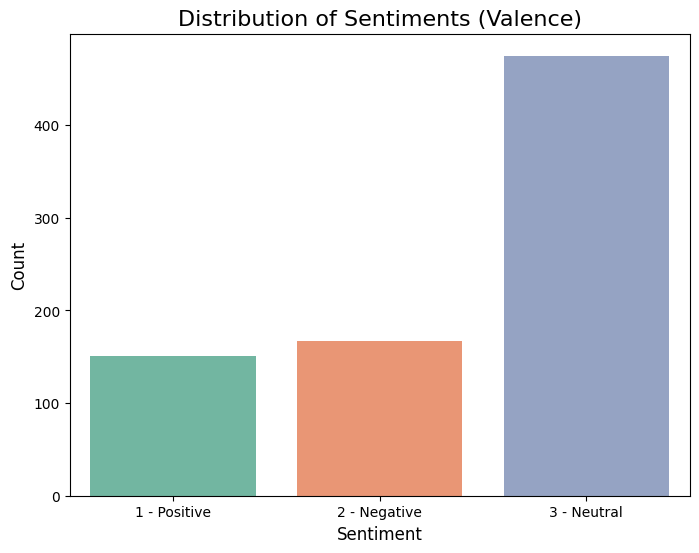

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each Valence category
valence_count = df['Valence'].value_counts().sort_index()

# Plot a column chart (bar chart)
plt.figure(figsize=(8, 6))
sns.barplot(x=valence_count.index, y=valence_count.values, palette='Set2')

plt.title('Distribution of Sentiments (Valence)', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1, 2], ['1 - Positive', '2 - Negative', '3 - Neutral'], rotation=0)
plt.show()

If you decide to balance the dataset, you can consider the following methods:

1. Resampling
Oversampling Minority Classes: You can increase the number of instances in the minority classes (A and B) by duplicating data points or generating synthetic ones using techniques like SMOTE (Synthetic Minority Over-sampling Technique).

Undersampling Majority Class: You can reduce the number of instances in the majority class (C) to match the smaller classes. However, this could result in losing important data and potentially losing information.

In [34]:
print(df['Valence'].value_counts())

Valence
3    475
2    167
1    151
Name: count, dtype: int64


In [35]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.utils import resample

# Split the data into different classes
df_majority = df[df['Valence'] == 3]  # Majority class (class 3)
df_minority_1 = df[df['Valence'] == 2]  # Minority class 1 (class 2)
df_minority_2 = df[df['Valence'] == 1]  # Minority class 2 (class 1)

# Undersample the majority class
df_majority_undersampled = resample(df_majority, 
                                    replace=False,    # Do not allow replacement
                                    n_samples=len(df_minority_1),  # Equalize class size
                                    random_state=42)  # Set random seed for reproducibility

# Combine the undersampled majority class with the minority classes
df_undersampled = pd.concat([df_majority_undersampled, df_minority_1, df_minority_2])

# Shuffle the dataset (optional, but recommended)
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution after undersampling
print(df_undersampled['Valence'].value_counts())

# Now you can use `df_undersampled` for training your model


Valence
2    167
3    167
1    151
Name: count, dtype: int64


In [37]:
df = df_undersampled

df.head()

,title,Valence,tone,description,Vineeth,clean_tweet
0,feels like it's on a spectrum with socially ac...,1,NaN,NaN,NaN,feel like it' spectrum with social accept drug...
1,Even when I was smoking I was that guy who w...,1,NaN,NaN,NaN,even when smoke that would walk away have puff...
2,#???_??????????_????_????????\nDRUG FREE INDIA...,2,neutral,NaN,negative,#???_??????????_????_???????? drug free india ...
3,RT @Jackablack24214: Choose one \n-weed\n-alco...,1,NaN,NaN,NaN,choos -weed -alcohol -cigarett
4,@TwoSeamGrip 20k puffs for $17. I found a grea...,1,neutral,NaN,positive,puff $17. found great discount site that ship...


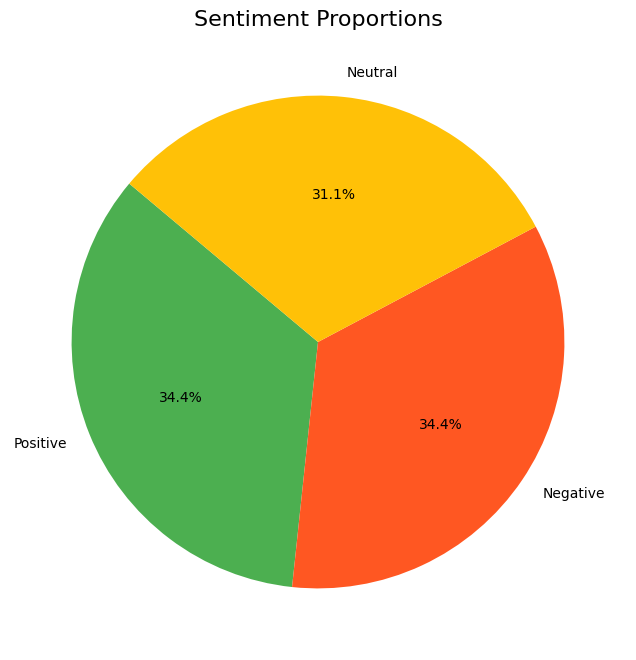

In [38]:
# Pie chart for sentiment distribution
plt.figure(figsize=(8, 8))
valence_count = df['Valence'].value_counts()

plt.pie(valence_count, labels=['Positive', 'Negative', 'Neutral'], autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FF5722', '#FFC107'])
plt.title('Sentiment Proportions', fontsize=16)
plt.show()


In [39]:
!pip install wordcloud

* Necessary installation process to use the wordcloud

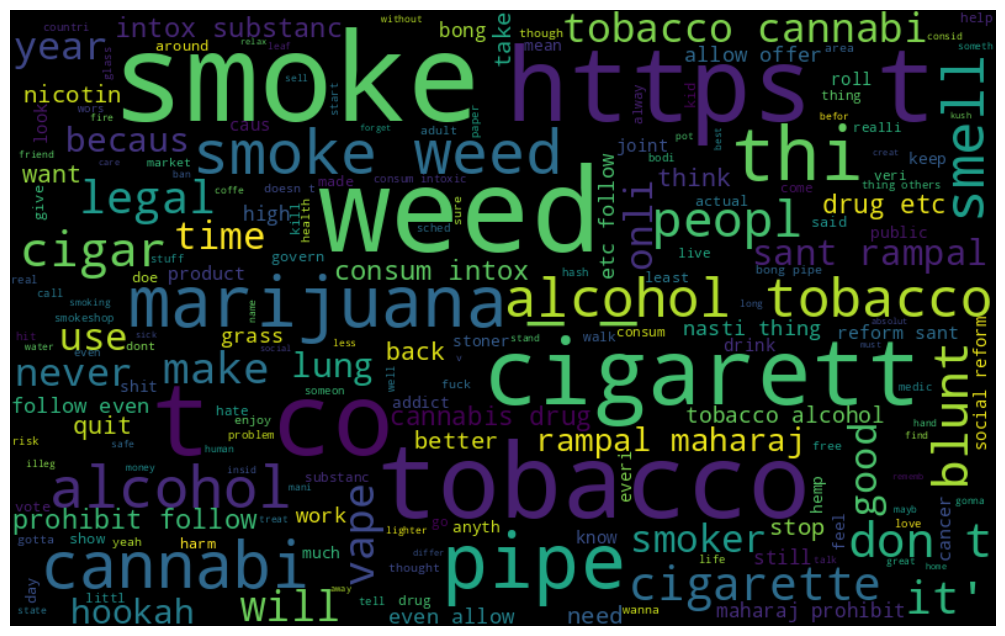

In [40]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* Filtering all frequent words from the data to plot graph using the word cloud

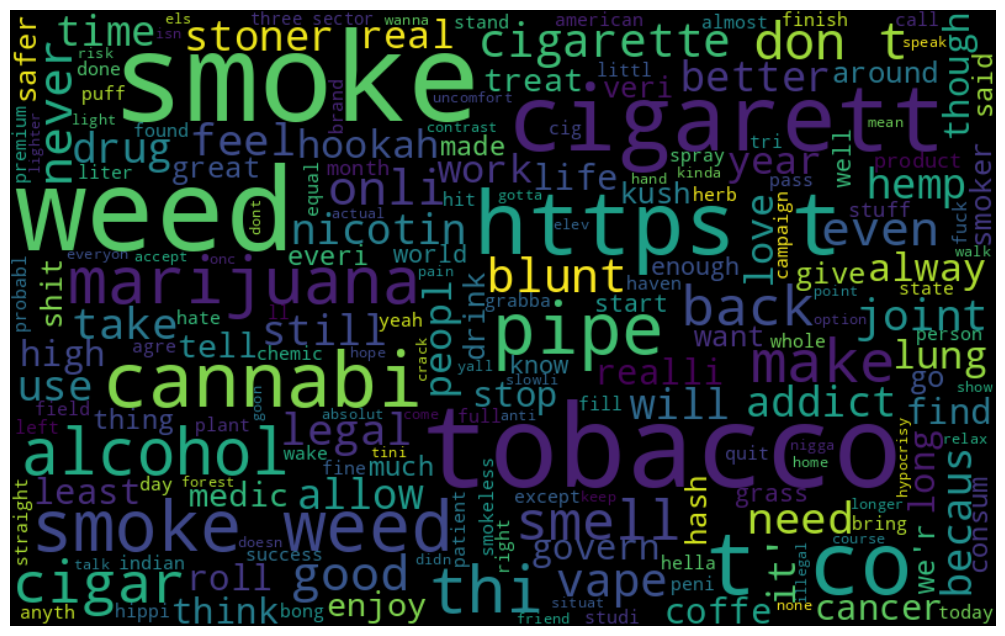

In [41]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['Valence']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

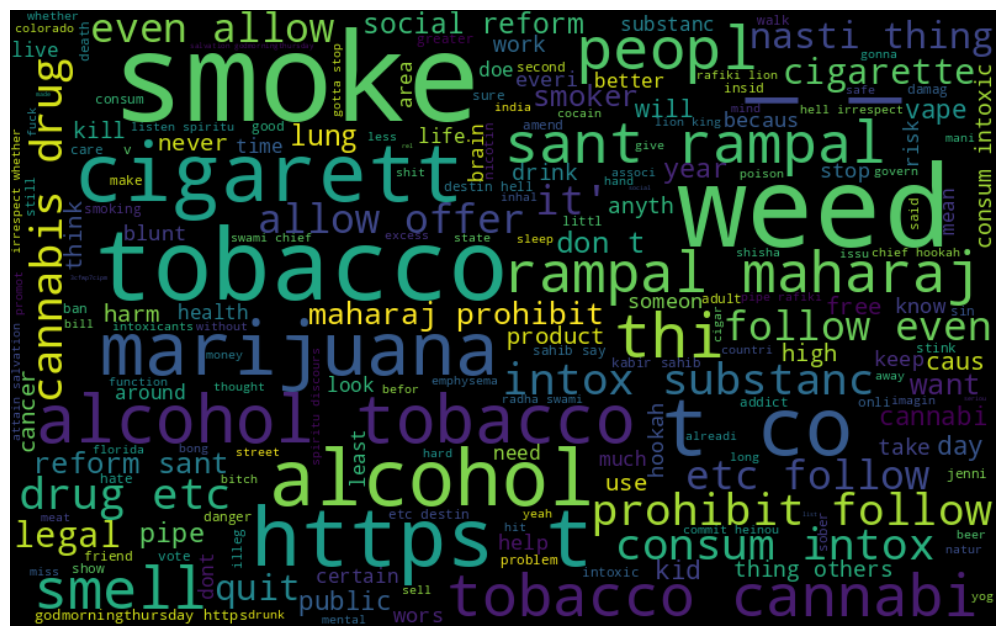

In [42]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['Valence']==2]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

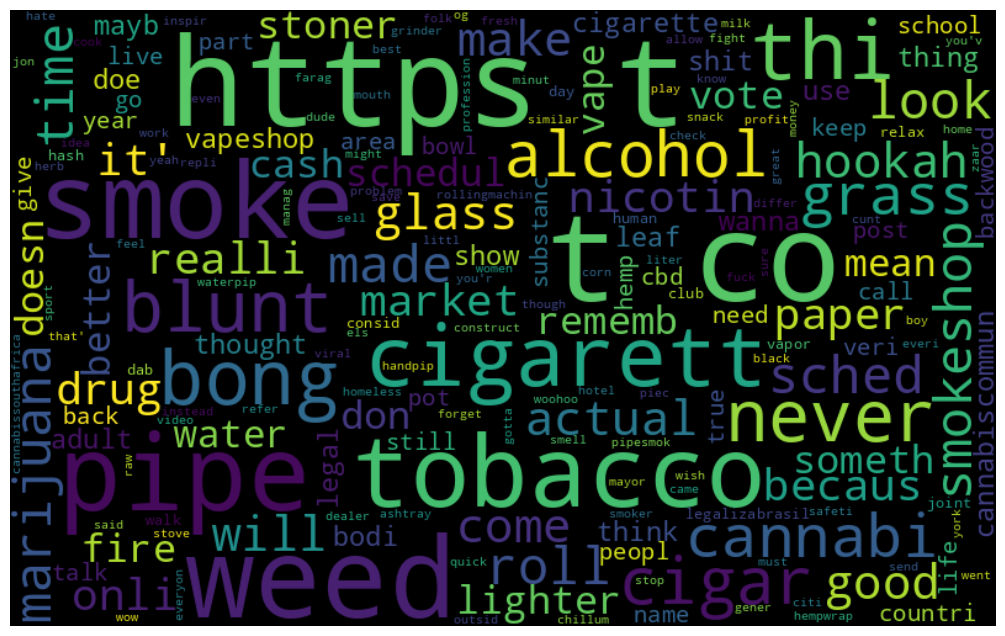

In [43]:
# frequent words visualization for neutral
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['Valence']==3]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

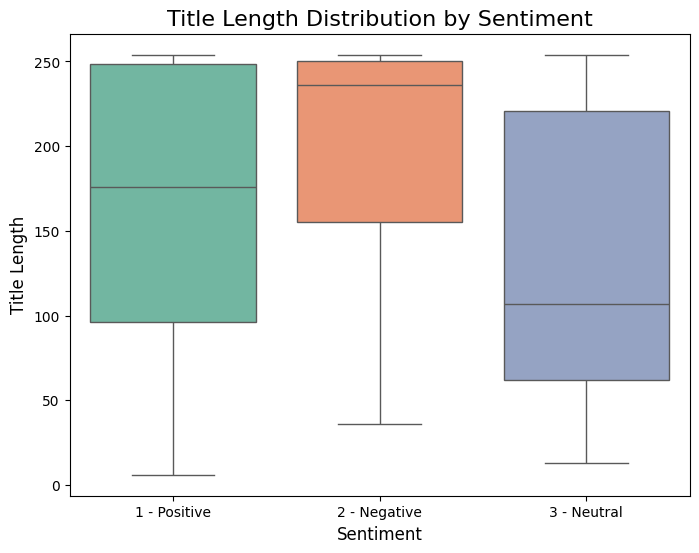

In [44]:
# Create a new column 'Title Length'
df['title_length'] = df['title'].apply(len)

# Box plot for title length across sentiment classes
plt.figure(figsize=(8, 6))
sns.boxplot(x='Valence', y='title_length', data=df, palette='Set2')

plt.title('Title Length Distribution by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Title Length', fontsize=12)
plt.xticks([0, 1, 2], ['1 - Positive', '2 - Negative', '3 - Neutral'], rotation=0)
plt.show()


In [45]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

* Extraction of all racist and non-racist hashtag content in the tweets, returning a list of hashtags

In [46]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['Valence']==1])

* Extraction of hashtags from positive tweets

In [47]:
# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['Valence']==2])

* Extraction of hashtags from negative tweets

In [48]:
# extract hashtags from racist/sexist tweets
ht_neutral = hashtag_extract(df['clean_tweet'][df['Valence']==3])

* Extraction of hashtags from neutral tweets

In [49]:
ht_positive[:5]

[[], [], [], [], []]

* Viewing the list of the extracted positive hashtags, in this example we are listing five for a simple view

In [50]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])
ht_neutral = sum(ht_neutral, [])

* Filtering and cleaning the words in the sentence for a better visualization and processing

In [51]:
ht_positive[:5]

['theydontgetit', 'cannabi', 'planopreston', 'cigaraficionado', 'lotr']

* Listing the words to view the results, now it can be processed more efficiently

In [52]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,theydontgetit,1
1,cannabi,1
2,planopreston,1
3,cigaraficionado,2
4,lotr,1


* Conversion of the dictionary into a dataframe to list positive hashtags with count

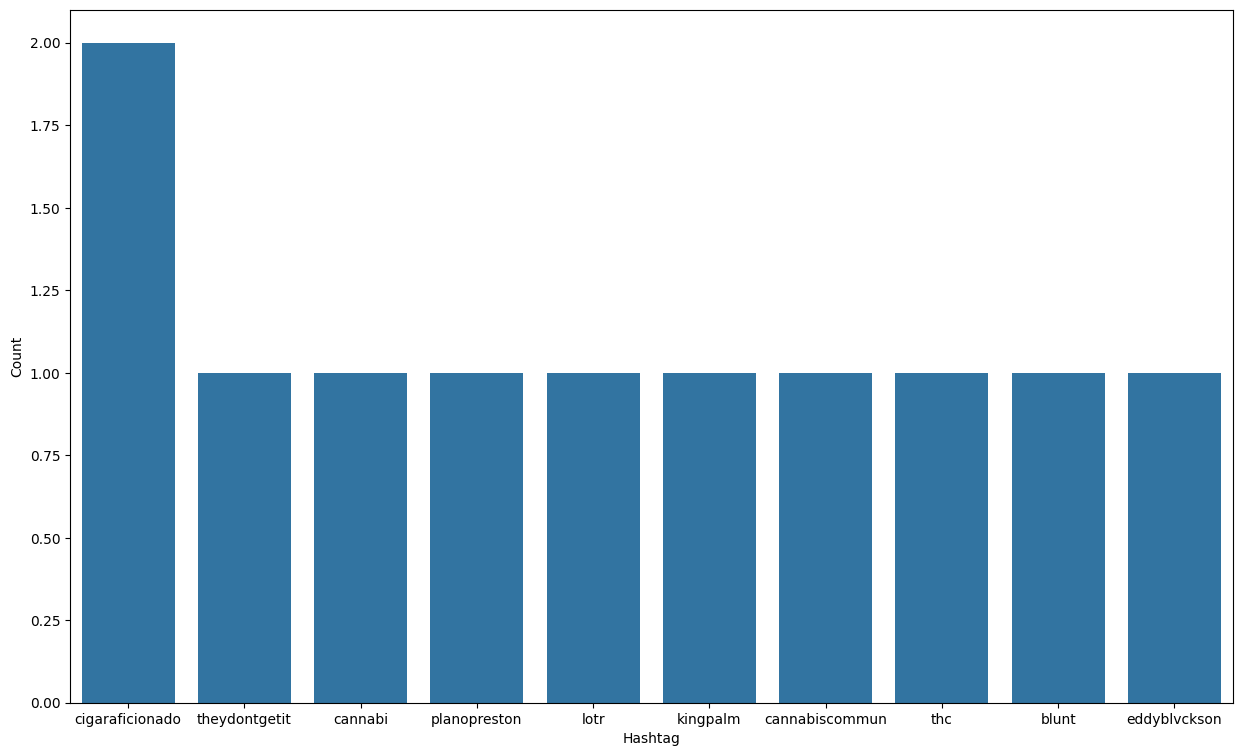

In [53]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

* Visualization through a bar graph for top ten positive hashtags with high frequency

In [54]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,godmorningthursday,5
1,post,1
2,socialreformer_santrampalji,1
3,socialreform,1
4,recoveryposs,2


* Conversion of the dictionary into a dataframe to list negative hashtags with count

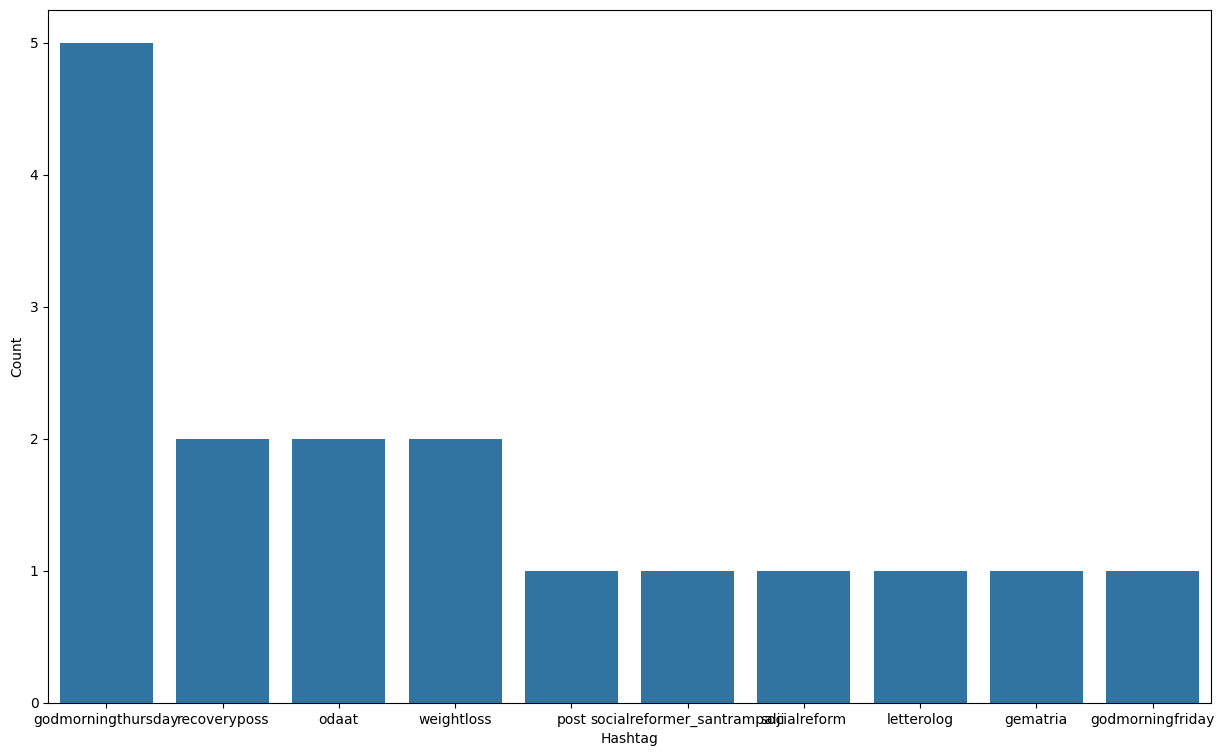

In [55]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

* Visualization through a bar graph for top ten negative hashtags with high frequency

## Input Split

The Input Split is a pre-process step for feature selection or feature extraction of the words in order to convert them into vectors for the machine to understand.

In [53]:
# feature extraction
%pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

Note: you may need to restart the kernel to use updated packages.


In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['Valence'], random_state=42, test_size=0.25)

## Model Training

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [56]:
model = LogisticRegression(max_iter=1000, multi_class='ovr')
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [57]:
pred = model.predict(x_test)
accuracy_score(y_test,pred)

0.6147540983606558

In [58]:
pred = model.predict(x_train)
accuracy_score(y_train,pred)

0.9366391184573003

In [59]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  5, 10],
       [14, 22,  5],
       [ 9,  4, 38]])

<Axes: >

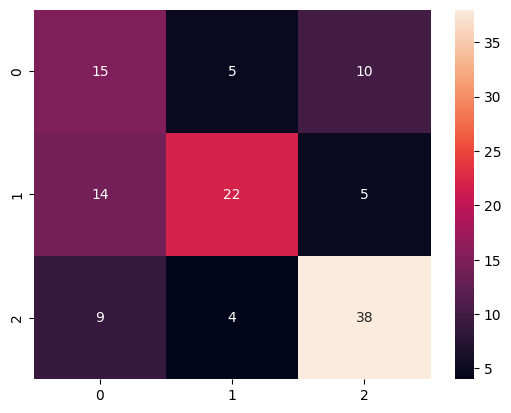

In [60]:
sns.heatmap(cm, annot=True)

In [61]:
import re
import numpy as np
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

def preprocess_and_vectorize_new_input(new_input, bow_vectorizer, stop_words='english'):
    # Function to remove patterns (e.g., Twitter handles)
    def remove_pattern(input_txt, pattern):
        r = re.findall(pattern, input_txt)
        for word in r:
            input_txt = re.sub(word, "", input_txt)
        return input_txt

   
    cleaned_input = remove_pattern(new_input, "@[\w]*")
    cleaned_input = re.sub("[^a-zA-Z#]", " ", cleaned_input)
    cleaned_input = " ".join([w for w in cleaned_input.split() if len(w) > 3])
    tokenized_input = cleaned_input.split()
    
    stemmer = PorterStemmer()
    tokenized_input = [stemmer.stem(word) for word in tokenized_input]
    cleaned_input = " ".join(tokenized_input)
    new_input_vectorized = bow_vectorizer.transform([cleaned_input])
    
    return new_input_vectorized

new_input = "RT @shannakaee: BLUNT - rolled with leaf ie: backwoods"
new_input_vectorized = preprocess_and_vectorize_new_input(new_input, bow_vectorizer)

print(new_input_vectorized)


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (1, 761)>
  Coords	Values
  (0, 46)	1
  (0, 66)	1
  (0, 380)	1
  (0, 563)	1


In [62]:
import joblib

joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(bow_vectorizer, 'bow_vectorizer.pkl')

['bow_vectorizer.pkl']

In [63]:
# Load the saved model
model = joblib.load('sentiment_model.pkl')
bow_vectorizer = joblib.load('bow_vectorizer.pkl')

In [64]:
prediction = model.predict(new_input_vectorized)
print(f"Predicted Sentiment: {prediction[0]}")

new_sentences = "Can you can legally buy alcohol, weed and tobacco which is INFINITELY more dangerous than a natural food like milk"
s1=preprocess_and_vectorize_new_input(new_sentences,bow_vectorizer)
prediction = model.predict(s1)
print(f"Predicted Sentiment: {prediction[0]}")

sen2 = "Smoking is injurious to health"
new_input_vectorized = preprocess_and_vectorize_new_input(sen2, bow_vectorizer)
prediction = model.predict(new_input_vectorized)
print(f"Predicted Sentiment: {prediction[0]}")

Predicted Sentiment: 3
Predicted Sentiment: 2
Predicted Sentiment: 3


Trying Different Machine Learning Model to improve the efficiency of model. 

In [6]:
%pip install tensorflow

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
import re
from nltk.stem.porter import PorterStemmer

Note: you may need to restart the kernel to use updated packages.


2025-02-25 01:13:11.908858: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-25 01:13:12.032992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740426192.086987    4041 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740426192.104107    4041 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-25 01:13:12.227487: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [66]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

def preprocess_and_vectorize_data(df, tokenizer, max_sequence_length=40):
    processed_sentences = []
    for text in df["title"]:
        cleaned_input = remove_pattern(text, "@[\w]*")  # Remove Twitter handles
        cleaned_input = re.sub("[^a-zA-Z#]", " ", cleaned_input)  # Remove non-alphabetic characters
        cleaned_input = " ".join([w for w in cleaned_input.split() if len(w) > 3])  #Remove short words
        tokenized_input = cleaned_input.split()

        stemmer = PorterStemmer()
        tokenized_input = [stemmer.stem(word) for word in tokenized_input]
        processed_sentences.append(" ".join(tokenized_input))
    
    sequences = tokenizer.texts_to_sequences(processed_sentences)
    X = pad_sequences(sequences, maxlen=max_sequence_length)
    
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df["Valence"]) 
    y = to_categorical(y, num_classes=3)  #1 becomes [1, 0, 0]
    return X, y

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df["title"])

X, y = preprocess_and_vectorize_data(df, tokenizer)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

NameError: name 'Tokenizer' is not defined

In [67]:
tokenizer.word_index 

NameError: name 'tokenizer' is not defined

In [68]:
len(tokenizer.word_index )

NameError: name 'tokenizer' is not defined

In [69]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))
model.add(LSTM(units=128, return_sequences=False))  
# Increased LSTM units
model.add(Dropout(0.7)) #Reduced Dropout
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)    #to stop from overfitting
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping]) # Trying hyperparameterising

NameError: name 'Sequential' is not defined

In [70]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

AttributeError: 'LogisticRegression' object has no attribute 'evaluate'

In [71]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

NameError: name 'X_test' is not defined

In [72]:
# Get classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=['1', '2', '3'])
print(report)

NameError: name 'y_true_labels' is not defined

In [73]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()


NameError: name 'history' is not defined

<Figure size 800x600 with 0 Axes>

In [74]:
def preprocess_and_vectorize_new_input(new_sentences, tokenizer, max_sequence_length=40):
    # Function to remove patterns (e.g., Twitter handles)
    def remove_pattern(input_txt, pattern):
        r = re.findall(pattern, input_txt)
        for word in r:
            input_txt = re.sub(word, "", input_txt)
        return input_txt

    processed_sentences = []
    for text in new_sentences:
        # Clean and preprocess each new input sentence
        cleaned_input = remove_pattern(text, "@[\w]*")  # Remove Twitter handles
        cleaned_input = re.sub("[^a-zA-Z#]", " ", cleaned_input)  # Remove non-alphabetic characters
        cleaned_input = " ".join([w for w in cleaned_input.split() if len(w) > 3])  # Remove short words
        tokenized_input = cleaned_input.split()

        stemmer = PorterStemmer()
        tokenized_input = [stemmer.stem(word) for word in tokenized_input]
        processed_sentences.append(" ".join(tokenized_input))
    
    # Convert sentences to sequences and pad them
    new_sequences = tokenizer.texts_to_sequences(processed_sentences)
    new_X = pad_sequences(new_sequences, maxlen=max_sequence_length)
    
    return new_X

# Assuming the tokenizer is already fitted and the model is trained
new_sentences =["seam smoking a fat blunt ELTARUNE eltaruneart https://t.co/oJGvsaG4A0 https://t.co/BlEbLfiz7O"]

new_X = preprocess_and_vectorize_new_input(new_sentences, tokenizer)

# Predict using the trained model
predictions = model.predict(new_X)
predicted_labels = np.argmax(predictions, axis=1)

# Convert predicted labels back to original categories
predicted_categories = label_encoder.inverse_transform(predicted_labels)

print("Predictions:", predicted_categories)


NameError: name 'tokenizer' is not defined

## Trying New Model

In [56]:
df1 = df 
#pre-processed and balanced

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         485 non-null    object 
 1   Valence       485 non-null    int64  
 2   tone          240 non-null    object 
 3   description   0 non-null      float64
 4   Vineeth       240 non-null    object 
 5   clean_tweet   485 non-null    object 
 6   title_length  485 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 26.7+ KB


In [57]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from transformers import AdamW

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Assuming 'df' contains two columns: 'clean_tweet' and 'Valence'
# 'Valence' contains labels (e.g., 1, 2, 3)

# Tokenize the tweets
# Tokenize the tweets and include attention_mask
inputs = tokenizer(df1['clean_tweet'].tolist(), 
                   truncation=True, 
                   padding=True, 
                   max_length=128, 
                   return_tensors='pt')

# inputs = tokenizer(df['title'].tolist(), truncation=True, padding=True, max_length=128, return_tensors='pt')

# Convert the labels to a tensor
# Adjust labels to be zero-indexed
labels = torch.tensor(df1['Valence'].apply(lambda x: x - 1).tolist())


# Split the dataset into train and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(inputs['input_ids'], labels, test_size=0.1)

# Create DataLoader for train and validation sets
train_dataset = TensorDataset(train_inputs, train_labels)
val_dataset = TensorDataset(val_inputs, val_labels)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)



In [58]:
# Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Move the model to the GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

Epoch 1, Training loss: 1.1361146122217178
Epoch 1, Validation loss: 1.0161972492933273
Epoch 1, Accuracy: 0.4898
Confusion Matrix:
[[ 0  8  4]
 [ 0 16  3]
 [ 0 10  8]]


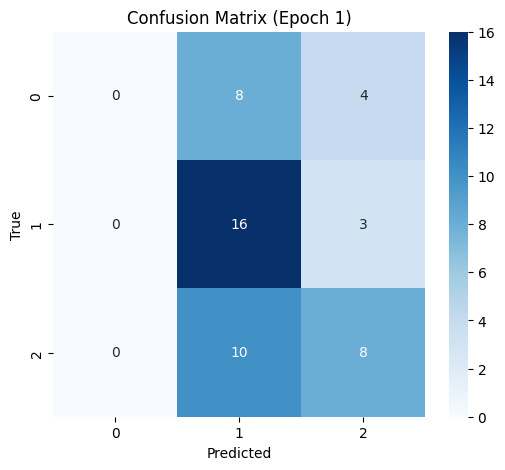

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.47      0.84      0.60        19
           2       0.53      0.44      0.48        18

    accuracy                           0.49        49
   macro avg       0.33      0.43      0.36        49
weighted avg       0.38      0.49      0.41        49

Epoch 2, Training loss: 1.012052602001599
Epoch 2, Validation loss: 0.8677785471081734
Epoch 2, Accuracy: 0.4694
Confusion Matrix:
[[ 2  0 10]
 [ 3  4 12]
 [ 0  1 17]]


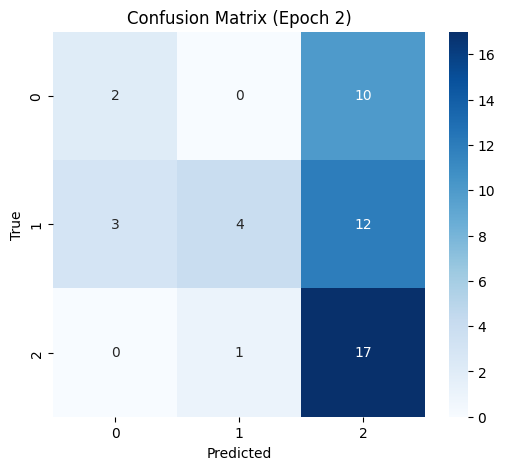

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.17      0.24        12
           1       0.80      0.21      0.33        19
           2       0.44      0.94      0.60        18

    accuracy                           0.47        49
   macro avg       0.55      0.44      0.39        49
weighted avg       0.57      0.47      0.41        49

Epoch 3, Training loss: 0.9467902843441282
Epoch 3, Validation loss: 0.7933481968939304
Epoch 3, Accuracy: 0.5102
Confusion Matrix:
[[11  0  1]
 [16  2  1]
 [ 6  0 12]]


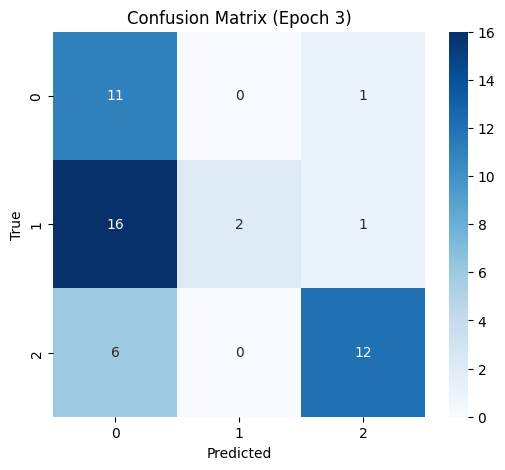

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.92      0.49        12
           1       1.00      0.11      0.19        19
           2       0.86      0.67      0.75        18

    accuracy                           0.51        49
   macro avg       0.73      0.56      0.48        49
weighted avg       0.78      0.51      0.47        49



In [59]:
import torch
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Modify the train function to track predictions for evaluation
def train(model, train_dataloader, val_dataloader, optimizer, device, epochs=3):
    for epoch in range(epochs):
        model.train()  # Set the model to training mode
        total_loss = 0
        
        for batch in train_dataloader:
            # Move data to GPU (if available)
            b_input_ids, b_labels = [item.to(device) for item in batch]
            
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(b_input_ids, labels=b_labels)
            loss = outputs.loss
            total_loss += loss.item()
            
            # Backward pass
            loss.backward()
            optimizer.step()
        
        # Calculate the average loss over the entire epoch
        avg_train_loss = total_loss / len(train_dataloader)
        print(f"Epoch {epoch + 1}, Training loss: {avg_train_loss}")
        
        # Validation
        model.eval()  # Set the model to evaluation mode
        total_eval_loss = 0
        all_preds = []  # Store predictions
        all_labels = []  # Store true labels
        with torch.no_grad():
            for batch in val_dataloader:
                b_input_ids, b_labels = [item.to(device) for item in batch]
                
                # Forward pass
                outputs = model(b_input_ids, labels=b_labels)
                total_eval_loss += outputs.loss.item()
                
                # Get predictions
                logits = outputs.logits
                preds = torch.argmax(logits, dim=1)  # Choose the class with the highest score
                
                # Append predictions and labels
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(b_labels.cpu().numpy())
        
        # Calculate the average validation loss
        avg_val_loss = total_eval_loss / len(val_dataloader)
        print(f"Epoch {epoch + 1}, Validation loss: {avg_val_loss}")
        
        # Calculate accuracy
        accuracy = accuracy_score(all_labels, all_preds)
        print(f"Epoch {epoch + 1}, Accuracy: {accuracy:.4f}")
        
        # Confusion Matrix
        cm = confusion_matrix(all_labels, all_preds)
        print(f"Confusion Matrix:\n{cm}")
        
        # Plot Confusion Matrix using Seaborn heatmap
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f"Confusion Matrix (Epoch {epoch+1})")
        plt.show()
        
        # Classification Report
        report = classification_report(all_labels, all_preds, target_names=[str(i) for i in range(3)])
        print(f"Classification Report:\n{report}")

optimizer = AdamW(model.parameters(), lr=5e-5)        
# Train the model
train(model, train_dataloader, val_dataloader, optimizer, device, epochs=3)


In [9]:
pip install transformers datasets torch scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [77]:
from tensorflow.keras import layers, models

In [10]:
df.head()

,title,Valence,tone,description,Vineeth
0,RT @shannakaee: BLUNT - rolled with leaf ie: b...,3,neutral,NaN,neutral
1,"RT @SynthNiska: If we're talking tobacco, good...",1,positive,NaN,positive
2,@RepThomasMassie Can you introduce a bill decr...,2,negative,NaN,negative
3,"You know, dank herb. The za. The lord's loud. ...",3,positive,NaN,neutral
4,"@riddikulus_puff Weed, wet dog, clean laundry,...",3,positive,NaN,neutral


df used in below is normal without any pre-processing and removing duplicates and unbalanced dataset. the original without any filters.

In [11]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from transformers import AdamW

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Assuming 'df' contains two columns: 'clean_tweet' and 'Valence'
# 'Valence' contains labels (e.g., 1, 2, 3)

# Tokenize the tweets
# Tokenize the tweets and include attention_mask
inputs = tokenizer(df['title'].tolist(), 
                   truncation=True, 
                   padding=True, 
                   max_length=128, 
                   return_tensors='pt')

# inputs = tokenizer(df['title'].tolist(), truncation=True, padding=True, max_length=128, return_tensors='pt')

# Convert the labels to a tensor
# Adjust labels to be zero-indexed
labels = torch.tensor(df['Valence'].apply(lambda x: x - 1).tolist())


# Split the dataset into train and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(inputs['input_ids'], labels, test_size=0.1)

# Create DataLoader for train and validation sets
train_dataset = TensorDataset(train_inputs, train_labels)
val_dataset = TensorDataset(val_inputs, val_labels)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)



2025-02-25 01:25:38.327238: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-25 01:25:38.337482: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740426938.349176    8711 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740426938.352529    8711 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-25 01:25:38.364830: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [12]:
# Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Move the model to the GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Epoch 1, Training loss: 0.8065313419751954
Epoch 1, Validation loss: 0.8044369220733643
Epoch 1, Accuracy: 0.6100
Confusion Matrix:
[[ 0 15  3]
 [ 0 23  2]
 [ 0 19 38]]


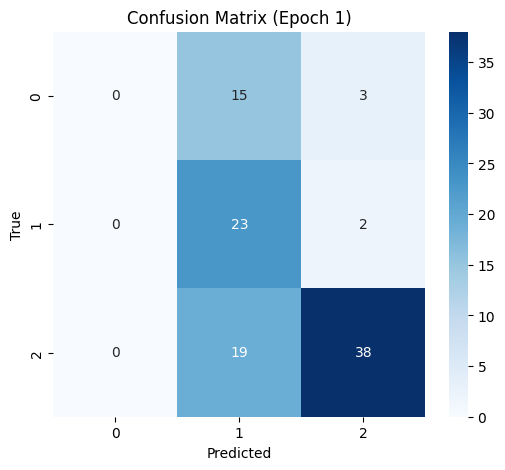

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.40      0.92      0.56        25
           2       0.88      0.67      0.76        57

    accuracy                           0.61       100
   macro avg       0.43      0.53      0.44       100
weighted avg       0.60      0.61      0.57       100

Epoch 2, Training loss: 0.5602183148526308
Epoch 2, Validation loss: 0.6321932822465897
Epoch 2, Accuracy: 0.7500
Confusion Matrix:
[[14  0  4]
 [10  9  6]
 [ 5  0 52]]


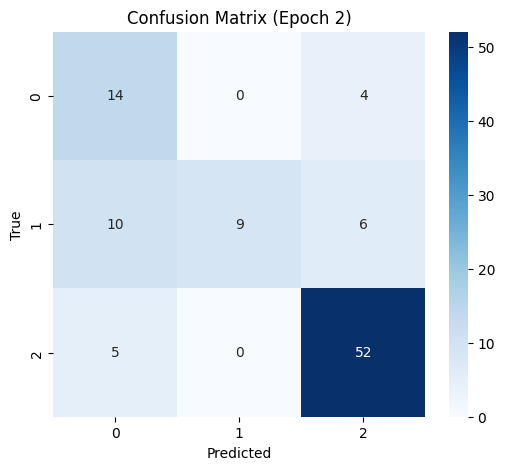

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.78      0.60        18
           1       1.00      0.36      0.53        25
           2       0.84      0.91      0.87        57

    accuracy                           0.75       100
   macro avg       0.77      0.68      0.67       100
weighted avg       0.81      0.75      0.74       100

Epoch 3, Training loss: 0.36239132500792803
Epoch 3, Validation loss: 0.6079821554677827
Epoch 3, Accuracy: 0.7700
Confusion Matrix:
[[ 9  5  4]
 [ 3 18  4]
 [ 4  3 50]]


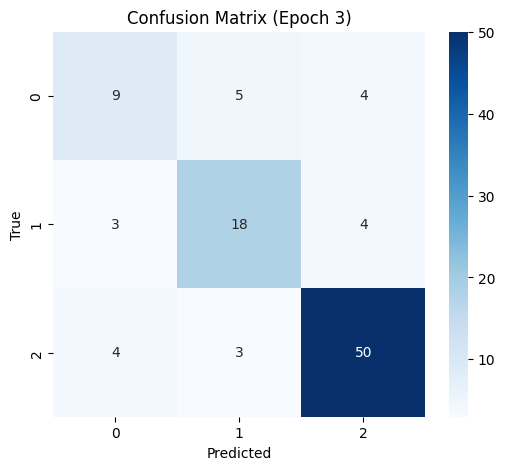

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        18
           1       0.69      0.72      0.71        25
           2       0.86      0.88      0.87        57

    accuracy                           0.77       100
   macro avg       0.71      0.70      0.70       100
weighted avg       0.77      0.77      0.77       100



In [14]:
import torch
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Modify the train function to track predictions for evaluation
def train(model, train_dataloader, val_dataloader, optimizer, device, epochs=3):
    for epoch in range(epochs):
        model.train()  # Set the model to training mode
        total_loss = 0
        
        for batch in train_dataloader:
            # Move data to GPU (if available)
            b_input_ids, b_labels = [item.to(device) for item in batch]
            
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(b_input_ids, labels=b_labels)
            loss = outputs.loss
            total_loss += loss.item()
            
            # Backward pass
            loss.backward()
            optimizer.step()
        
        # Calculate the average loss over the entire epoch
        avg_train_loss = total_loss / len(train_dataloader)
        print(f"Epoch {epoch + 1}, Training loss: {avg_train_loss}")
        
        # Validation
        model.eval()  # Set the model to evaluation mode
        total_eval_loss = 0
        all_preds = []  # Store predictions
        all_labels = []  # Store true labels
        with torch.no_grad():
            for batch in val_dataloader:
                b_input_ids, b_labels = [item.to(device) for item in batch]
                
                # Forward pass
                outputs = model(b_input_ids, labels=b_labels)
                total_eval_loss += outputs.loss.item()
                
                # Get predictions
                logits = outputs.logits
                preds = torch.argmax(logits, dim=1)  # Choose the class with the highest score
                
                # Append predictions and labels
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(b_labels.cpu().numpy())
        
        # Calculate the average validation loss
        avg_val_loss = total_eval_loss / len(val_dataloader)
        print(f"Epoch {epoch + 1}, Validation loss: {avg_val_loss}")
        
        # Calculate accuracy
        accuracy = accuracy_score(all_labels, all_preds)
        print(f"Epoch {epoch + 1}, Accuracy: {accuracy:.4f}")
        
        # Confusion Matrix
        cm = confusion_matrix(all_labels, all_preds)
        print(f"Confusion Matrix:\n{cm}")
        
        # Plot Confusion Matrix using Seaborn heatmap
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f"Confusion Matrix (Epoch {epoch+1})")
        plt.show()
        
        # Classification Report
        report = classification_report(all_labels, all_preds, target_names=[str(i) for i in range(3)])
        print(f"Classification Report:\n{report}")

optimizer = AdamW(model.parameters(), lr=5e-5)        
# Train the model
train(model, train_dataloader, val_dataloader, optimizer, device, epochs=3)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Training loss: 1.1000985120024
Epoch 1, Validation loss: 1.0175901651382446
Epoch 1, Accuracy: 0.5306
Confusion Matrix:
[[ 0 10  2]
 [ 0 16  1]
 [ 0 10 10]]


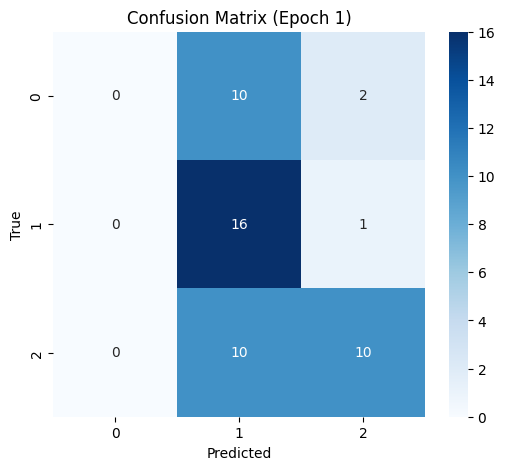

Classification Report:
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        12
    Negative       0.44      0.94      0.60        17
     Neutral       0.77      0.50      0.61        20

    accuracy                           0.53        49
   macro avg       0.40      0.48      0.40        49
weighted avg       0.47      0.53      0.46        49

Epoch 2, Training loss: 1.0250136022056853
Epoch 2, Validation loss: 0.9319207817316055
Epoch 2, Accuracy: 0.5510
Confusion Matrix:
[[ 0 10  2]
 [ 1 16  0]
 [ 4  5 11]]


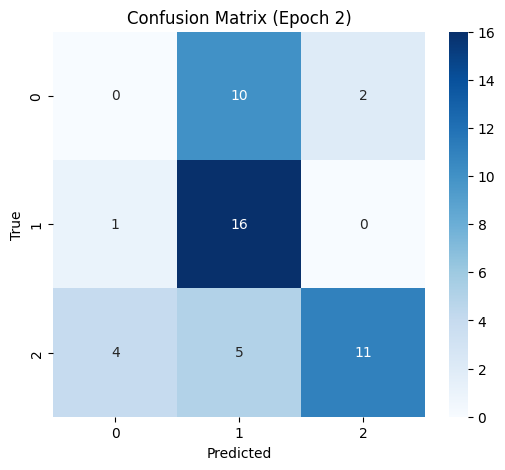

Classification Report:
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        12
    Negative       0.52      0.94      0.67        17
     Neutral       0.85      0.55      0.67        20

    accuracy                           0.55        49
   macro avg       0.45      0.50      0.44        49
weighted avg       0.52      0.55      0.50        49

Epoch 3, Training loss: 0.9244926231248038
Epoch 3, Validation loss: 0.9017185866832733
Epoch 3, Accuracy: 0.5306
Confusion Matrix:
[[ 1  9  2]
 [ 1 15  1]
 [ 6  4 10]]


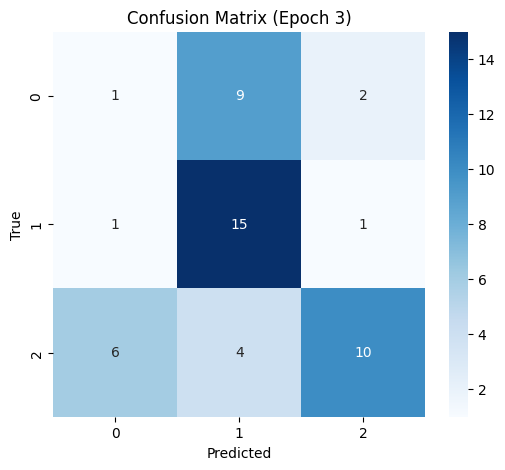

Classification Report:
              precision    recall  f1-score   support

    Positive       0.12      0.08      0.10        12
    Negative       0.54      0.88      0.67        17
     Neutral       0.77      0.50      0.61        20

    accuracy                           0.53        49
   macro avg       0.48      0.49      0.46        49
weighted avg       0.53      0.53      0.50        49



In [62]:
#try 3

import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# Clean the tweets (you can adjust the function according to your requirements)
def clean_text(text):
    text = text.lower()  # Lowercase the text
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\S+', '', text)  # Remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = ' '.join(text.split())  # Remove extra spaces
    return text

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Assuming you have a DataFrame 'df' with 'clean_tweet' and 'Valence' columns
df['clean_tweet'] = df['clean_tweet'].apply(clean_text)

# Tokenize the tweets
inputs = tokenizer(df['clean_tweet'].tolist(), 
                   truncation=True, 
                   padding=True, 
                   max_length=128, 
                   return_tensors='pt')

# Convert labels to tensor (adjust for zero-indexing)
labels = torch.tensor(df['Valence'].apply(lambda x: x - 1).tolist())

# Split the dataset into training and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(inputs['input_ids'], labels, test_size=0.1, random_state=42)

# Create DataLoader for training and validation
train_dataset = TensorDataset(train_inputs, train_labels)
val_dataset = TensorDataset(val_inputs, val_labels)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)

# Load pre-trained BERT for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Move the model to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set up the optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=5e-5)

# Set up the learning rate scheduler
epochs = 3
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training function
def train(model, train_dataloader, val_dataloader, optimizer, scheduler, device, epochs=3):
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        total_loss = 0
        for batch in train_dataloader:
            # Move data to GPU (if available)
            b_input_ids, b_labels = [item.to(device) for item in batch]

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(b_input_ids, labels=b_labels)
            loss = outputs.loss
            total_loss += loss.item()

            # Backward pass
            loss.backward()
            optimizer.step()
            scheduler.step()

        # Calculate the average training loss
        avg_train_loss = total_loss / len(train_dataloader)
        print(f"Epoch {epoch + 1}, Training loss: {avg_train_loss}")

        # Validation phase
        model.eval()  # Set model to evaluation mode
        all_preds = []
        all_labels = []
        total_eval_loss = 0
        with torch.no_grad():
            for batch in val_dataloader:
                b_input_ids, b_labels = [item.to(device) for item in batch]

                # Forward pass
                outputs = model(b_input_ids, labels=b_labels)
                total_eval_loss += outputs.loss.item()

                # Get predictions
                logits = outputs.logits
                preds = torch.argmax(logits, dim=1)

                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(b_labels.cpu().numpy())

        # Calculate the average validation loss
        avg_val_loss = total_eval_loss / len(val_dataloader)
        print(f"Epoch {epoch + 1}, Validation loss: {avg_val_loss}")

        # Calculate Accuracy
        accuracy = accuracy_score(all_labels, all_preds)
        print(f"Epoch {epoch + 1}, Accuracy: {accuracy:.4f}")

        # Confusion Matrix
        cm = confusion_matrix(all_labels, all_preds)
        print(f"Confusion Matrix:\n{cm}")

        # Plot Confusion Matrix using Seaborn heatmap
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f"Confusion Matrix (Epoch {epoch+1})")
        plt.show()

        # Classification Report
        report = classification_report(all_labels, all_preds, target_names=["Positive", "Negative", "Neutral"])
        print(f"Classification Report:\n{report}")

# Train the model
train(model, train_dataloader, val_dataloader, optimizer, scheduler, device, epochs=3)


In [63]:
pip install nlpaug


Note: you may need to restart the kernel to use updated packages.


#trying to augment 

In [70]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/apoorva-kabra/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [75]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Your input text
text = "NLTK is a powerful toolkit for NLP tasks."

# Apply spaCy's NLP pipeline to the text
doc = nlp(text)

# Print out the words and their POS tags
for token in doc:
    print(f"{token.text}: {token.pos_}")


NLTK: PROPN
is: AUX
a: DET
powerful: ADJ
toolkit: NOUN
for: ADP
NLP: PROPN
tasks: NOUN
.: PUNCT


In [76]:
import spacy
import random
from spacy import displacy
import re
import nltk
from nltk.corpus import wordnet

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to get synonyms using WordNet (integrating with spaCy)
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return list(synonyms)

# Function to augment a sentence by replacing words with synonyms using spaCy
def augment_sentence_spacy(sentence):
    doc = nlp(sentence)
    augmented_sentence = []
    
    for token in doc:
        # Only replace nouns, verbs, adjectives, or adverbs
        if token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV']:
            synonyms = get_synonyms(token.text)
            if synonyms:
                # Randomly choose a synonym to replace the word with
                synonym = random.choice(synonyms)
                augmented_sentence.append(synonym)
            else:
                augmented_sentence.append(token.text)  # Keep the original word if no synonym found
        else:
            augmented_sentence.append(token.text)  # Keep non-target words (e.g., stop words)
    
    return ' '.join(augmented_sentence)

# Function to augment the data (generate multiple augmented versions per text)
def augment_data(texts, n=5):
    augmented_texts = []
    for text in texts:
        augmented_texts.append(text)  # Original text
        for _ in range(n - 1):  # Generate n-1 augmented texts per sample
            augmented_texts.append(augment_sentence_spacy(text))
    return augmented_texts

# Clean the tweets (you can adjust the function according to your requirements)
def clean_text(text):
    text = text.lower()  # Lowercase the text
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\S+', '', text)  # Remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = ' '.join(text.split())  # Remove extra spaces
    return text

# Example usage
# df = {'clean_tweet': ["I love programming!", "Python is amazing.", "Data science is cool."]}

# Clean the tweets
# cleaned_texts = [clean_text(tweet) for tweet in df['clean_tweet']]

# # Augment the cleaned texts
# augmented_texts = augment_data(cleaned_texts, n=5)
# print(augmented_texts)


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nlpaug.augmenter.word as naw
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re


In [73]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /home/apoorva-
[nltk_data]     kabra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/apoorva-
[nltk_data]     kabra/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home/apoorva-
[nltk_data]     kabra/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [77]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Assuming you have a DataFrame 'df' with 'clean_tweet' and 'Valence' columns
df['clean_tweet'] = df['clean_tweet'].apply(clean_text)

# Augment the data (generate synthetic data)
augmented_texts = augment_data(df['clean_tweet'].tolist(), n=5)  # 5 augmented texts per sample
augmented_labels = df['Valence'].apply(lambda x: x - 1).tolist() * 5  # Repeat labels for the augmented data

In [78]:
# Tokenize the augmented tweets
inputs = tokenizer(augmented_texts, 
                   truncation=True, 
                   padding=True, 
                   max_length=128, 
                   return_tensors='pt')

# Convert augmented labels to tensor
labels = torch.tensor(augmented_labels)

# Split the dataset into training and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(inputs['input_ids'], labels, test_size=0.1, random_state=42)

# Create DataLoader for training and validation
train_dataset = TensorDataset(train_inputs, train_labels)
val_dataset = TensorDataset(val_inputs, val_labels)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)

In [79]:
# Load pre-trained BERT for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Move the model to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set up the optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=5e-5)

# Set up the learning rate scheduler
epochs = 5  # Increase the number of epochs
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Training loss: 1.1118764611926393
Epoch 1, Validation loss: 1.0991730988025665
Epoch 1, Accuracy: 0.3374
New best accuracy achieved: 0.3374
Confusion Matrix:
[[ 0 79  0]
 [ 0 82  0]
 [ 0 82  0]]


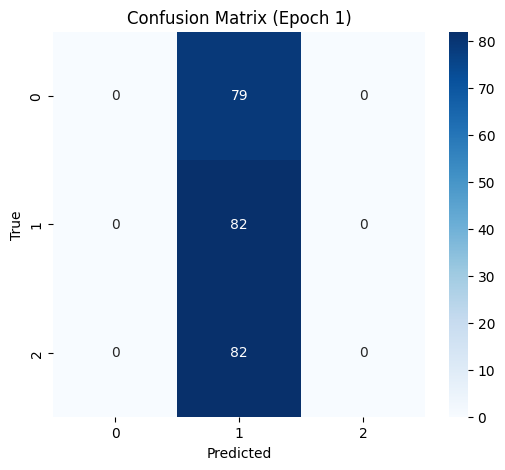

Classification Report:
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        79
    Negative       0.34      1.00      0.50        82
     Neutral       0.00      0.00      0.00        82

    accuracy                           0.34       243
   macro avg       0.11      0.33      0.17       243
weighted avg       0.11      0.34      0.17       243

Epoch 2, Training loss: 1.1052389762697428
Epoch 2, Validation loss: 1.1131324768066406
Epoch 2, Accuracy: 0.3004
Confusion Matrix:
[[54 25  0]
 [63 19  0]
 [62 20  0]]


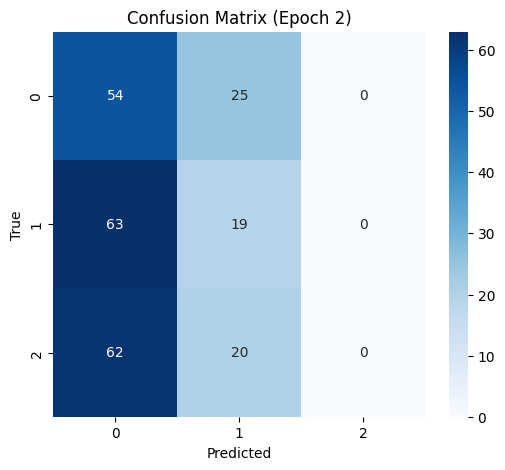

Classification Report:
              precision    recall  f1-score   support

    Positive       0.30      0.68      0.42        79
    Negative       0.30      0.23      0.26        82
     Neutral       0.00      0.00      0.00        82

    accuracy                           0.30       243
   macro avg       0.20      0.31      0.23       243
weighted avg       0.20      0.30      0.22       243

Epoch 3, Training loss: 1.1134362168555711
Epoch 3, Validation loss: 1.1022875308990479
Epoch 3, Accuracy: 0.3374
Confusion Matrix:
[[ 0  0 79]
 [ 0  0 82]
 [ 0  0 82]]


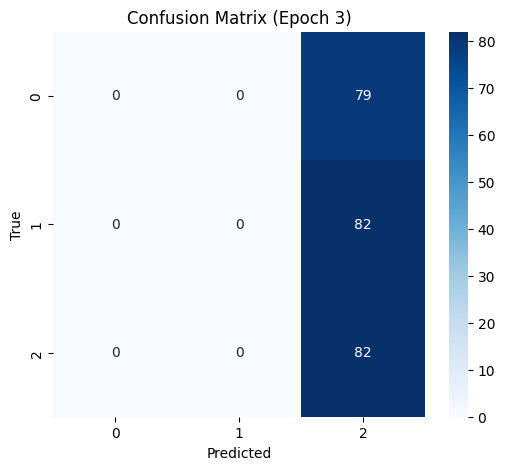

Classification Report:
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        79
    Negative       0.00      0.00      0.00        82
     Neutral       0.34      1.00      0.50        82

    accuracy                           0.34       243
   macro avg       0.11      0.33      0.17       243
weighted avg       0.11      0.34      0.17       243

Epoch 4, Training loss: 1.1045859260280637
Epoch 4, Validation loss: 1.100696586072445
Epoch 4, Accuracy: 0.3374
Confusion Matrix:
[[ 0  0 79]
 [ 0  0 82]
 [ 0  0 82]]


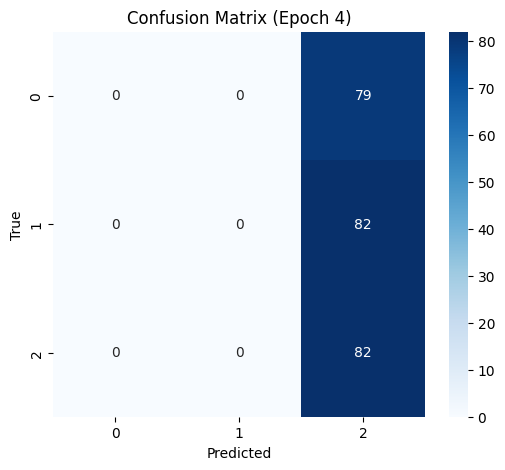

Classification Report:
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        79
    Negative       0.00      0.00      0.00        82
     Neutral       0.34      1.00      0.50        82

    accuracy                           0.34       243
   macro avg       0.11      0.33      0.17       243
weighted avg       0.11      0.34      0.17       243

Epoch 5, Training loss: 1.10706248683651
Epoch 5, Validation loss: 1.0985613763332367
Epoch 5, Accuracy: 0.3210
Confusion Matrix:
[[ 0 33 46]
 [ 0 34 48]
 [ 0 38 44]]


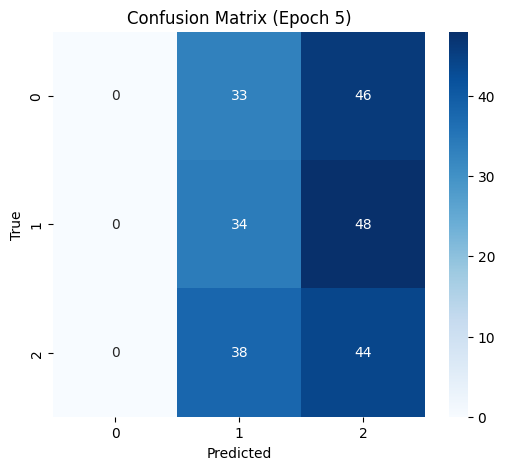

Classification Report:
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        79
    Negative       0.32      0.41      0.36        82
     Neutral       0.32      0.54      0.40        82

    accuracy                           0.32       243
   macro avg       0.21      0.32      0.25       243
weighted avg       0.22      0.32      0.26       243



In [80]:
# Training function
def train(model, train_dataloader, val_dataloader, optimizer, scheduler, device, epochs=5):
    best_accuracy = 0  # To track the best model based on validation accuracy
    
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        total_loss = 0
        for batch in train_dataloader:
            # Move data to GPU (if available)
            b_input_ids, b_labels = [item.to(device) for item in batch]

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(b_input_ids, labels=b_labels)
            loss = outputs.loss
            total_loss += loss.item()

            # Backward pass
            loss.backward()
            optimizer.step()
            scheduler.step()

        # Calculate the average training loss
        avg_train_loss = total_loss / len(train_dataloader)
        print(f"Epoch {epoch + 1}, Training loss: {avg_train_loss}")

        # Validation phase
        model.eval()  # Set model to evaluation mode
        all_preds = []
        all_labels = []
        total_eval_loss = 0
        with torch.no_grad():
            for batch in val_dataloader:
                b_input_ids, b_labels = [item.to(device) for item in batch]

                # Forward pass
                outputs = model(b_input_ids, labels=b_labels)
                total_eval_loss += outputs.loss.item()

                # Get predictions
                logits = outputs.logits
                preds = torch.argmax(logits, dim=1)

                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(b_labels.cpu().numpy())

        # Calculate the average validation loss
        avg_val_loss = total_eval_loss / len(val_dataloader)
        print(f"Epoch {epoch + 1}, Validation loss: {avg_val_loss}")

        # Calculate Accuracy
        accuracy = accuracy_score(all_labels, all_preds)
        print(f"Epoch {epoch + 1}, Accuracy: {accuracy:.4f}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            print(f"New best accuracy achieved: {best_accuracy:.4f}")

        # Confusion Matrix
        cm = confusion_matrix(all_labels, all_preds)
        print(f"Confusion Matrix:\n{cm}")

        # Plot Confusion Matrix using Seaborn heatmap
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f"Confusion Matrix (Epoch {epoch+1})")
        plt.show()

        # Classification Report
        report = classification_report(all_labels, all_preds, target_names=["Positive", "Negative", "Neutral"])
        print(f"Classification Report:\n{report}")

# Train the model
train(model, train_dataloader, val_dataloader, optimizer, scheduler, device, epochs=5)